In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [131]:
df = pd.read_csv('process_data.csv')

In [132]:
X = df.drop(columns=['Class'])  # Các đặc trưng đầu vào
y = df['Class']  # Nhãn mục tiêu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [133]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model = LogisticRegression(class_weight={0:1, 1:6}, random_state=42, C = 0.1,penalty="l2")


scorer = make_scorer(recall_score)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)


print(f"Cross-Validation Recall Scores: {cv_scores}")
print(f"Mean Cross-Validation Recall Score: {np.mean(cv_scores)}")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Cross-Validation Recall Scores: [0.73076923 0.86075949 0.81012658 0.78481013 0.78481013]
Mean Cross-Validation Recall Score: 0.7942551119766309
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.967863531174991


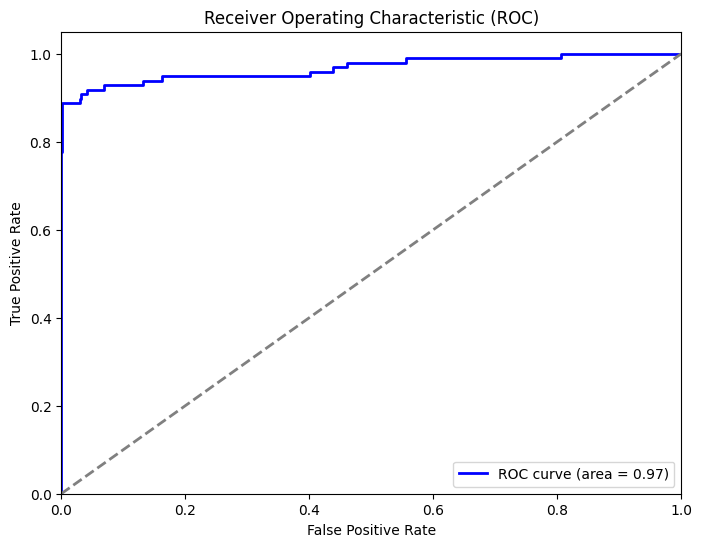

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualization của ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

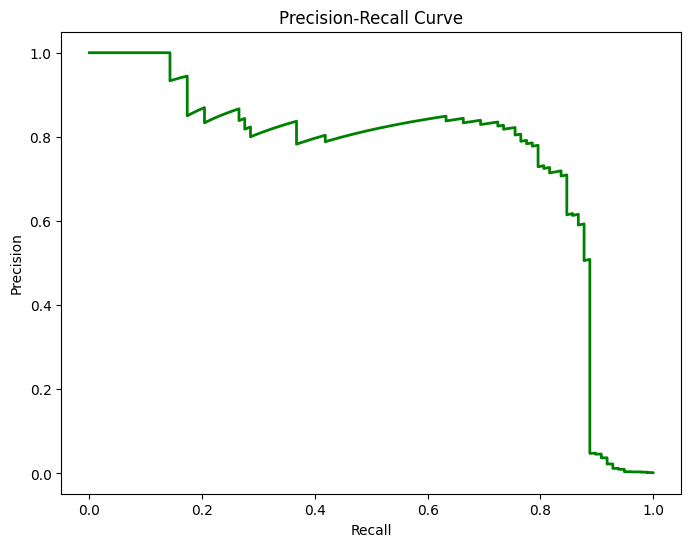

In [136]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Visualization của Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()